![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parte 1: Projetores e Refletores

## Questão 1: Projeção ortogonal

Escreva uma função `proj(v)` que retorna **uma função**
que calcula a projeção ortogonal de um vetor qualquer $u$  em $v$.

In [51]:
def proj(v):
    vv = np.asarray(v)
    def aux(u):
        return ((np.dot(vv,u))*vv) / (np.linalg.norm(vv))**2
    return aux

In [52]:
f2 = proj([0,1])
assert np.allclose(f2([0,2]), [0,2])
assert np.allclose(f2([1,0]), [0,0])

In [53]:
f3 = proj([0,1,2])
assert np.allclose(f3([0,1,1]), [0, 0.6, 1.2])
assert np.allclose(f3([2,1,0]), [0, 0.2, 0.4])

In [54]:
fbig = proj([1,1,-2,3,-1,2])
assert np.allclose(4*fbig([1,1,1,1,0,1]), [1,1,-2,3,-1,2])

## Questão 2: Matriz da projeção

Escreva uma função `matr_proj(v)` que calcula a matriz de projeção no vetor $v$.

In [55]:
def matr_proj(v):
    f=proj(v)
    matr= [f(u) for u in np.transpose(v)]
    return np.array(matr)

In [56]:
M2 = matr_proj([1,2])
assert np.allclose(M2, [[0.2, 0.4], [0.4, 0.8]])

AssertionError: 

In [57]:
M5 = matr_proj([1,2,0,-3,1])
assert np.shape(M5) == (5,5)
assert abs(M5[3,3] - 0.6) < 1e-15

AssertionError: 

In [ ]:
v = [1,-2]
u = [1,1]

M = matr_proj(v)
f = proj(v)

assert np.allclose(M@u, f(u))

Explique o assert acima

YOUR ANSWER HERE

## Questão 3: Tempos

Compare o tempo que a função de projeção leva com o tempo que a multiplicação pela matriz de projeção leva,
em vetores de tamanho 80.

Dica: use `%timeit`, o tempo deve estar na ordem de **micro**segundos

In [ ]:
v = np.random.rand(80)
u = np.random.rand(80)
# YOUR CODE HERE
raise NotImplementedError()

Faça o mesmo, em vetores de tamanho 400.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

E de tamanho 2000...

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explique porque isso acontece.

YOUR ANSWER HERE

## Questão 4: Projetores parciais

Suponha agora que temos um vetor $u \in R^{n+m}$,
e vamos projetar apenas as $m$ últimas coordenadas na direção do vetor $v \in R^m$
(as $n$ primeiras coordenadas permanecem inalteradas).
Generalize a sua função `proj(v)` para que a função retornada funcione para qualquer vetor $u$ de dimensão maior ou igual a $m$.

In [ ]:
def proj_gen(v):
    m = len(v)
    def aux(u):
        assert len(u) >= m
        # YOUR CODE HERE
        raise NotImplementedError()
    return aux

In [ ]:
g2 = proj_gen([1,1])
assert np.all(g2([-1,2.]) == [1/2, 1/2])

In [ ]:
g2 = proj_gen([1,1])
assert np.all(g2([6,5,4,3,2,1.]) == [6. , 5. , 4. , 3. , 1.5, 1.5])

In [ ]:
g2 = proj_gen([1,-3])
assert np.allclose(g2([6,5,4,3,2,1.]), [ 6. ,  5. ,  4. ,  3. , -0.1,  0.3])

Que outros testes você faria para verificar que a sua função `proj_gen` está funcionando como imaginado?

Dê, na caixa abaixo, a justificativa para os testes,
e nas duas caixas seguintes, dois exemplos de cada um.

YOUR ANSWER HERE

In [ ]:
# Testes 1
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Testes 2
# YOUR CODE HERE
raise NotImplementedError()

## Questão 5: Reflexões

Podemos construir uma reflexão $R_v$ a partir de uma projeção $P_v$ pela seguinte fórmula:
$$
  R_v(u) = u - 2(u - P_v(u)).
$$

Explique o significado do termo $u - P_v(u)$ na fórmula acima.

YOUR ANSWER HERE

Simplifique a fórmula (claro!) e implemente a função `refl(v)` que faz a reflexão "segundo o vetor $v$".

In [ ]:
def refl(v):
    vv = np.asarray(v)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
r2 = refl([1,1])
assert np.allclose(r2([3,1]), [1,3])

In [ ]:
r4 = refl([1,3,2,1])
assert np.allclose(r4([3,3,3,3]), [-0.2, 5.4, 2.6, -0.2])

## Questão 6: Refletindo a reflexão

Uma reflexão é uma **involução**: aplicada duas vezes, ela volta ao início.

Mostre (algebricamente) que a fórmula que demos para a reflexão de fato produz uma involução.
Ou seja, mostre que, dados $v$ e $u$ quaisquer, $R_v(R_v(u)) = u$.

YOUR ANSWER HERE

Use esta ideia para construir testes (aleatórios) para a sua função de reflexão.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# Parte 2: Integrais interpolatórias

Vimos, na lista 3, que dados os pontos $x_i$ no intervalo $[-1,1]$,
podemos criar uma "regra de integração" para uma função $f$ que é equivalente a:
1. Calcular o polinômio interpolador de $f$ nos nós $x_i$
2. Calcular a integral deste polinômio no intervalo $[-1,1]$.

## Questão 7: Pontos de Chebyshev

Há duas famílias de pontos de Chebyshev:
1. Interiores: da forma $\cos\left( \frac{2k+1}{2n} \pi \right)$, para $k$ de $0$ a $n$ (exclusive)

2. De bordo: da forma $\cos\left( \frac{k}{n} \pi \right)$, para $k$ de $0$ a $n$ (inclusive)

In [90]:
def cheby1(n):
    l=[]
    for k in range(n):
        x = np.pi*((2*k+1)*(0.5*(1/2*n)))
        l.append(np.cos(x))
    return l
def cheby2(n):
    l=[]
    for k in range(n+1):
        x = np.pi*(k/n)
        l.append(np.cos(x))
    return l

In [91]:
assert len(cheby1(5)) == 5
assert len(cheby2(5)) == 6

In [92]:
c5 = cheby1(15)
assert np.all(c5[1:] < c5[:-1])

c5 = cheby2(25)
assert np.all(c5[1:] < c5[:-1])


Faça um desenho destes pontos, e explique a nomenclatura.

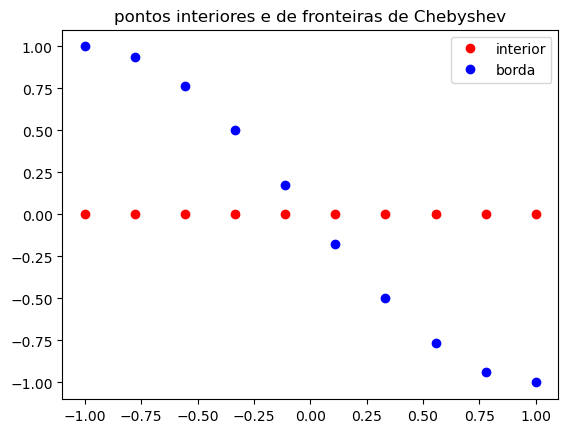

In [133]:
x=np.linspace(-1,1,10)
c1=cheby1(len(x))
c2=cheby2(len(x)-1)
plt.plot(x,c1,'ro',label='interior')
plt.plot(x,c2,'bo',label='borda')
plt.legend()
plt.title("pontos interiores e de fronteiras de Chebyshev")
ax = plt.gca()

In [126]:
assert len(ax.legend().texts) == 2
assert len(ax.get_title()) >= 10

Explique aqui

In [ ]:
ax = None

## Questão 8: Integrando polinômios

Escreva a função que, para um polinômio $P$, dado por seus coeficientes em ordem crescente,
calcula a integral de $P$ no intervalo $[-1,1]$.

In [ ]:
def base_int(p):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert base_int([1,2,3]) == 4

In [ ]:
assert np.isclose(base_int([5,4,3,2,1]), 12.4)

## Questão 9: Integração interpolatória

Escreva uma função que recebe um conjunto $n$ de pontos $x_i$ do intervalo $[-1,1]$,
e calcula pesos $w_i$ tais que

$$ \int_{-1}^1 P(x) \, dx = \sum_{i=1}^n w_i P(x_i) $$

para todos os polinômios $P$ de grau menor do que $n$.

In [ ]:
def pesos(xs):
    xs = np.asarray(xs)
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
assert np.allclose(pesos([-1, 1]), [1, 1])

In [ ]:
assert np.allclose(pesos([-1, 0, 1]), [1/3, 4/3, 1/3])

O que estes dois primeiros testes verificam?

YOUR ANSWER HERE

In [ ]:
w4 = pesos(cheby1(4))
assert np.allclose(w4, [0.26429774, 0.73570226, 0.73570226, 0.26429774])

## Questão 10: Integrando funções

Vamos usar os mesmos pesos para integrar funções que não são polinômios.

In [ ]:
xs = cheby1(4)
w4 = pesos(xs)

assert 2e-4 <= np.dot(w4, np.cos(xs)) - (np.sin(1) - np.sin(-1)) <= 2e-3
assert 2e-4 <= np.dot(w4, np.exp(xs)) - (np.exp(1) - np.exp(-1)) <= 2e-3

O que estes testes mostram?

YOUR ANSWER HERE

In [ ]:
xs = cheby2(10)
w10 = pesos(xs)

assert np.abs(np.dot(w10, np.cos(xs)) - (np.sin(1) - np.sin(-1))) < 1e-12
assert np.abs(np.dot(w10, np.exp(xs)) - (np.exp(1) - np.exp(-1))) < 1e-12

O que os estes testes mostram, em comparação com os anteriores?
Isso é esperado?

YOUR ANSWER HERE

## Questão 11: Evolução da precisão

Faça um gráfico do erro de integração da função $e^{2x}$ no intervalo $[-1, 1]$
em função do número de pontos de Chebyshev utilizados.

Deve haver duas curvas: uma para os pontos de tipo 1, outra para os pontos de tipo 2.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [ ]:
assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) >= 5

O que você percebe quanto à velocidade com que os erros tendem a zero?

YOUR ANSWER HERE

## Questão 12: Integradores

Escreva a função `make_integrator` que recebe `xs`, os pontos $x_i$ no intervalo $[-1,1]$,
e retorna uma função `int_interp(f, a, b, n)` que
- Recebe uma função $f$, um intervalo $[a,b]$ e um número de subdivisões $n$
- Divide o intervalo em $n$ subintervalos de mesmo tamanho
- Calcula a integral de $f$ em cada um destes subintervalos usando pontos correspondentes (por translação e homotetia) aos pontos $x_i$
- E retorna a soma como uma aproximação da integral de $f$ no intervalo $[a,b]$.

In [ ]:
def make_integrator(xs):
    xs = np.asarray(xs, dtype=float)
    ws = pesos(xs)
    def int_interp(f, a, b, n):
        # YOUR CODE HERE
        raise NotImplementedError()

    return int_interp

In [ ]:
f2 = make_integrator([1/2, -1/2])
assert 1e-4 < np.abs(f2(np.exp, 2, 5, 200) - (np.exp(5) - np.exp(2))) < 1e-3

In [ ]:
f5 = make_integrator([0,1/2,-1/2,1,-1])
assert 5e-14 < np.abs(f5(np.exp, 2, 5, 80) - (np.exp(5) - np.exp(2))) < 5e-13

Comente os dois testes acima, e explique porque eles são uma comparação "justa" dos métodos.

YOUR ANSWER HERE

Calcule os erros de integração da função $e^{2x}$ no intervalo $[-1,4]$,
para o método que usa 10 pontos de Chebyshev,
em função do número de subintervalos.

In [ ]:
fcheby = make_integrator(cheby1(10))
# YOUR CODE HERE
raise NotImplementedError()

ax = plt.gca()

In [ ]:
assert len(ax.lines) == 1

assert len(ax.get_title()) >= 10
assert len(ax.get_xlabel()) >= 5

Qual a velocidade de convergência deste método?

YOUR ANSWER HERE